In [1]:
import numpy as np           #importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"               #reading the data
data= pd.read_csv(url)

Exploratory Data Analysis


In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.shape      #the structure of the dataset is foundout.It has 25 rows and 2 columns.

(25, 2)

In [7]:
data.isna().sum()      #checking for null values

Hours     0
Scores    0
dtype: int64

<Axes: >

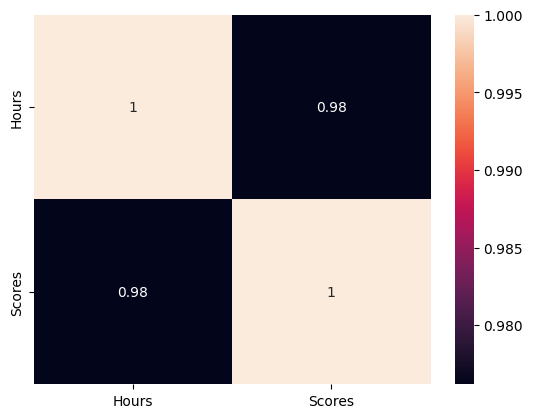

In [8]:
corrmatrix=data.corr()             #Finding the correlation between the 2 variables.
sns.heatmap(corrmatrix,annot=True)

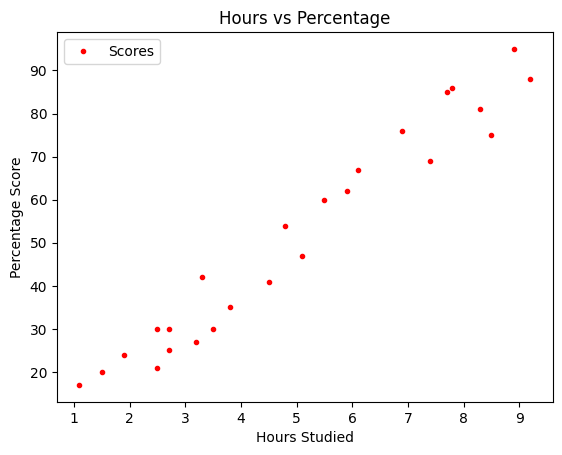

In [9]:
data.plot(x='Hours', y='Scores', style='.',c="r")     #plotting the data to see if there is any relationship between the variables
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

We can see that there is a positive correlation between the variables 'Hours' and 'Scores'.

## Preparing the data

In [35]:
y=data['Scores']      #dividing the data into "attributes" (inputs) and "labels" (outputs)
x=data.drop(['Scores'],axis=1)

In [36]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [37]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


## **Training the algorithm**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)    #splitting the dataset for testig and training

In [16]:
x_train,x_test

(    Hours
 9     2.7
 13    3.3
 1     5.1
 22    3.8
 5     1.5
 2     3.2
 12    4.5
 15    8.9
 3     8.5
 4     3.5
 20    2.7
 17    1.9
 21    4.8
 18    6.1
 24    7.8
 7     5.5
 10    7.7
 14    1.1
 19    7.4
 6     9.2,
     Hours
 8     8.3
 16    2.5
 0     2.5
 23    6.9
 11    5.9)

In [17]:
y_train,y_test

(9     25
 13    42
 1     47
 22    35
 5     20
 2     27
 12    41
 15    95
 3     75
 4     30
 20    30
 17    24
 21    54
 18    67
 24    86
 7     60
 10    85
 14    17
 19    69
 6     88
 Name: Scores, dtype: int64,
 8     81
 16    30
 0     21
 23    76
 11    62
 Name: Scores, dtype: int64)

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [19]:
model=lr.fit(x_train,y_train)
print("Training complete")

Training complete


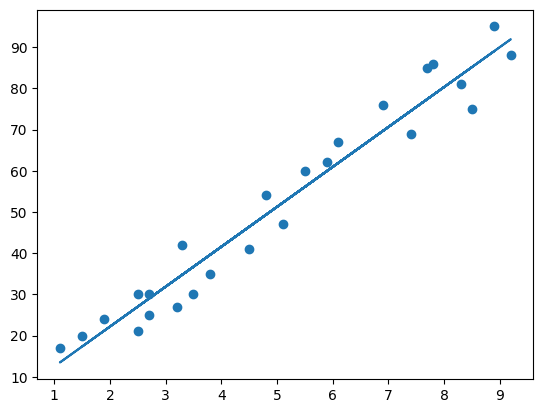

In [20]:
# Plotting the regression line
line =lr.coef_*x+lr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

## **Making predictions**

In [24]:
y_pred=model.predict(x_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [22]:
# Comparing Actual vs Predicted
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [40]:
hours = 9.25
own_pred =model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## **Evaluating the model**

In [34]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
